<center><h1>**Kelompok 2**<h1></center>
<center>20 September 2025</center>
<center><h1>Palm Recognition Menggunakan Convolutional Neural Network (CNN)<h1></center>

* Ahmad Taufiq Hidayat (2202074)
* Setyawan Humay Senja 

# 1. Pendahuluan

Laporan ini mendokumentasikan proses pembuatan model deep learning untuk pengenalan telapak tangan. Tujuannya adalah untuk mengklasifikasikan gambar telapak tangan ke dalam kelas-kelas (individu) yang berbeda berdasarkan fitur fitur unik pada telapak tangan. Proyek ini menggunakan Convolutional Neural Network (CNN), sebuah arsitektur yang sangat efektif untuk tugas-tugas pengenalan gambar.

Dataset didapat dari kaggle dengan judul Sapienza University Mobile Palmprint Database:SMPD. yang dapat diakses melalui link ini https://www.kaggle.com/datasets/mahdieizadpanah/sapienza-university-mobile-palmprint-databasesmpd

Prosesnya mencakup beberapa tahapan utama:

- Persiapan Dataset: Memuat dan mengatur dataset gambar telapak tangan.
- Pra proses Gambar (Preprocessing): Menyiapkan gambar agar optimal untuk pelatihan model, meliputi konversi grayscale, penyesuaian ukuran (resize), peningkatan kontras dengan CLAHE, dan normalisasi ROI.
- Pembuatan dan Pelatihan Model: Merancang, mengompilasi, dan melatih model CNN.
- Evaluasi Model: Menganalisis kinerja model menggunakan metrik seperti akurasi dan loss, serta mengamati hasil prediksi pada data validasi.

# 2. Persiapan Environment dan Dataset

Langkah pertama adalah mengimpor semua pustaka Python yang diperlukan untuk pemrosesan gambar, pembuatan model, dan visualisasi data.

In [1]:
# import library yang diperlukan
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

## Load dataset

In [2]:
path_dataset = "../Dataset"
class_dirs = sorted([
    d for d in os.listdir(path_dataset)
    if os.path.isdir(os.path.join(path_dataset, d))
])

print(f"Total folder kelas: {len(class_dirs)}")
print("Contoh 5 pertama:", class_dirs[:5])

Total folder kelas: 92
Contoh 5 pertama: ['001', '002', '003', '004', '005']


In [3]:
src_path = "../Dataset"             # folder asli
step1_path = "../Dataset_step1"     # hasil step 1 (grayscale+resize)
step2_path = "../Dataset_step2"     # hasil step 2 (contrast enhancement)
dst_path = "../Dataset_processed"   # hasil akhir (ROI normalized)

for p in [step1_path, step2_path, dst_path]:
    os.makedirs(p, exist_ok=True)

In [ ]:
# Daftar ekstensi file gambar yang akan diproses
extensions = ["*.jpg", "*.JPG", "*.jpeg", "*.png", "*.tif", "*.tiff"]

# Ukuran target untuk setiap gambar yang akan di-load (width=128, height=128)
target_size = (128, 128)

# Jumlah sampel yang akan diproses dalam satu batch saat training / loading
batch_size = 10

# Batas maksimal jumlah folder kelas yang akan digunakan
max_folders = 100

# Ambil daftar folder kelas
class_dirs = sorted([
    d for d in os.listdir(src_path)
    if os.path.isdir(os.path.join(src_path, d))
])
selected_dirs = class_dirs[:max_folders]

# 3. Pra proses Data (Preprocessing)

Pra proses adalah tahap krusial untuk meningkatkan kualitas data input, yang pada gilirannya akan meningkatkan kinerja model.

### Langkah 1: Grayscale dan Resize

Semua gambar diubah menjadi format grayscale (skala keabuan) untuk mengurangi kompleksitas komputasi dan difokuskan pada fitur tekstur seperti garis tangan. Ukuran gambar juga diseragamkan menjadi 128x128 piksel.

In [ ]:
# Fungsi preprocessing Step 1
def step1_grayscale_resize(img_path):
    img = Image.open(img_path).convert("L")   # Ubah gambar menjadi grayscale (mode "L")
    img = img.resize(target_size)             # Ubah ukuran gambar sesuai nilai target_size (width x height)
    return img                                # Kembalikan gambar yang sudah diproses

# Proses per batch agar tidak memakai memori terlalu banyak
batch_num = 1
for start in range(0, len(selected_dirs), batch_size):
    batch_folders = selected_dirs[start:start + batch_size]
    print(f"\nStep 1: Memproses batch {batch_num}: {batch_folders}")

    for folder in tqdm(batch_folders, desc="Step1 folders"):
        src_folder = os.path.join(src_path, folder)
        dst_folder = os.path.join(step1_path, folder)
        os.makedirs(dst_folder, exist_ok=True)

        files = []
        for ext in extensions:
            files.extend(glob.glob(os.path.join(src_folder, ext)))

        for f in files:
            try:
                img_proc = step1_grayscale_resize(f)
                fname = os.path.basename(f)
                img_proc.save(os.path.join(dst_folder, fname))
            except Exception as e:
                print("Error Step1:", f, e)

    print(f"Batch {batch_num} selesai.")
    batch_num += 1

print("\nStep 1 selesai. Semua gambar grayscale+resize tersimpan di:", step1_path)


Step 1: Memproses batch 1: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010']


Step1 folders: 100%|██████████| 10/10 [00:36<00:00,  3.70s/it]


Batch 1 selesai.

Step 1: Memproses batch 2: ['011', '012', '013', '014', '015', '016', '017', '018', '019', '020']


Step1 folders: 100%|██████████| 10/10 [00:36<00:00,  3.69s/it]


Batch 2 selesai.

Step 1: Memproses batch 3: ['021', '022', '023', '024', '025', '026', '027', '028', '029', '030']


Step1 folders: 100%|██████████| 10/10 [00:42<00:00,  4.28s/it]


Batch 3 selesai.

Step 1: Memproses batch 4: ['031', '032', '033', '034', '035', '036', '037', '038', '039', '040']


Step1 folders: 100%|██████████| 10/10 [00:47<00:00,  4.72s/it]


Batch 4 selesai.

Step 1: Memproses batch 5: ['041', '042', '043', '044', '045', '046', '047', '048', '049', '050']


Step1 folders: 100%|██████████| 10/10 [01:09<00:00,  6.92s/it]


Batch 5 selesai.

Step 1: Memproses batch 6: ['051', '052', '053', '055', '056', '057', '058', '059', '060', '061']


Step1 folders: 100%|██████████| 10/10 [00:40<00:00,  4.08s/it]


Batch 6 selesai.

Step 1: Memproses batch 7: ['062', '063', '064', '065', '066', '067', '068', '069', '070', '071']


Step1 folders: 100%|██████████| 10/10 [00:40<00:00,  4.01s/it]


Batch 7 selesai.

Step 1: Memproses batch 8: ['072', '073', '074', '075', '076', '077', '078', '079', '080', '081']


Step1 folders: 100%|██████████| 10/10 [00:40<00:00,  4.03s/it]


Batch 8 selesai.

Step 1: Memproses batch 9: ['082', '083', '084', '085', '086', '087', '088', '089', '090', '091']


Step1 folders: 100%|██████████| 10/10 [00:39<00:00,  3.99s/it]


Batch 9 selesai.

Step 1: Memproses batch 10: ['092', '093']


Step1 folders: 100%|██████████| 2/2 [00:07<00:00,  3.94s/it]

Batch 10 selesai.

Step 1 selesai. Semua gambar grayscale+resize tersimpan di: ../Dataset_step1


Contoh Hasil Grayscale dan Resize:



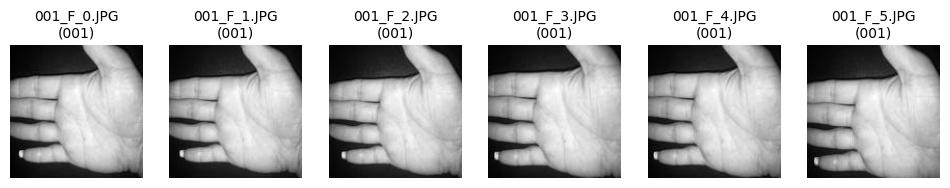

In [6]:
# Path folder Step 1
step1_path = "../Dataset_step1"

# Ambil semua file gambar dari semua folder
all_files = []
for folder in os.listdir(step1_path):
    folder_path = os.path.join(step1_path, folder)
    if os.path.isdir(folder_path):
        for ext in ["*.jpg", "*.JPG", "*.jpeg", "*.png", "*.tif", "*.tiff"]:
            all_files.extend(glob.glob(os.path.join(folder_path, ext)))

# Ambil 6 gambar pertama
sample_files = all_files[:6]

# Tampilkan
plt.figure(figsize=(12,6))
for i, f in enumerate(sample_files):
    img = Image.open(f)
    label = os.path.basename(os.path.dirname(f))  # nama folder sebagai label
    plt.subplot(1, 6, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"{os.path.basename(f)}\n({label})", fontsize=10)
plt.show()

## Langkah 2: Peningkatan Kontras dengan CLAHE

Contrast Limited Adaptive Histogram Equalization (CLAHE) digunakan untuk memperjelas garis-garis tangan dan fitur penting lainnya dengan meningkatkan kontras lokal pada gambar.

In [7]:

# Fungsi CLAHE
def step2_clahe(img_path, clipLimit=2.0, tileGridSize=(8,8)):
    # Buka gambar grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Buat objek CLAHE
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    img_clahe = clahe.apply(img)
    
    # Kembalikan sebagai PIL Image
    return Image.fromarray(img_clahe)

# Proses setiap folder
for folder in tqdm(selected_dirs, desc="Step2 folders (CLAHE)"):
    src_folder = os.path.join(step1_path, folder)
    dst_folder = os.path.join(step2_path, folder)
    os.makedirs(dst_folder, exist_ok=True)

    files = []
    for ext in extensions:
        files.extend(glob.glob(os.path.join(src_folder, ext)))

    for f in files:
        try:
            img_proc = step2_clahe(f, clipLimit=2.0, tileGridSize=(8,8))
            fname = os.path.basename(f)
            img_proc.save(os.path.join(dst_folder, fname))
        except Exception as e:
            print("Error Step2 CLAHE:", f, e)

print("\nStep 2 selesai. Semua gambar sudah di-CLAHE dan tersimpan di:", step2_path)

Step2 folders (CLAHE): 100%|██████████| 92/92 [00:29<00:00,  3.16it/s]


Step 2 selesai. Semua gambar sudah di-CLAHE dan tersimpan di: ../Dataset_step2


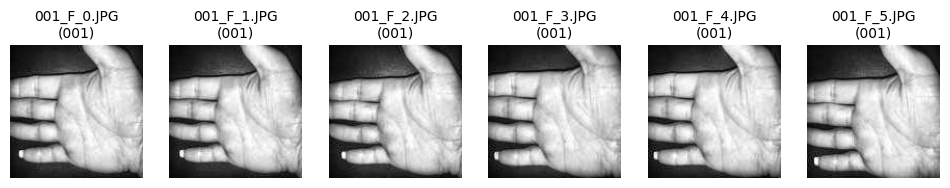

In [8]:
# Path folder Step 2
step2_path = "../Dataset_step2"

# Ambil semua file gambar dari semua folder
all_files = []
for folder in os.listdir(step2_path):
    folder_path = os.path.join(step2_path, folder)
    if os.path.isdir(folder_path):
        for ext in ["*.jpg", "*.JPG", "*.jpeg", "*.png", "*.tif", "*.tiff"]:
            all_files.extend(glob.glob(os.path.join(folder_path, ext)))

# Ambil 6 gambar pertama
sample_files = all_files[:6]

# Tampilkan
plt.figure(figsize=(12,6))
for i, f in enumerate(sample_files):
    img = Image.open(f)
    label = os.path.basename(os.path.dirname(f))  # nama folder sebagai label
    plt.subplot(1, 6, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"{os.path.basename(f)}\n({label})", fontsize=10)
plt.show()

Karena garis tangan masih kurang terlihat, nilai clipLimit ditingkatkan menjadi 3.0 agar kontras lebih jelas.

Step2 folders (CLAHE): 100%|██████████| 92/92 [00:07<00:00, 13.14it/s]



Step 2 selesai. Semua gambar sudah di-CLAHE dan tersimpan di: ../Dataset_step2


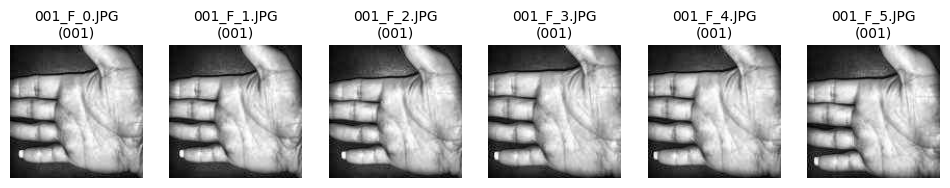

In [9]:

# Fungsi CLAHE
def step2_clahe(img_path, clipLimit=3.0, tileGridSize=(8,8)):
    # Buka gambar grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Buat objek CLAHE
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    img_clahe = clahe.apply(img)
    
    # Kembalikan sebagai PIL Image
    return Image.fromarray(img_clahe)

# Proses setiap folder
for folder in tqdm(selected_dirs, desc="Step2 folders (CLAHE)"):
    src_folder = os.path.join(step1_path, folder)
    dst_folder = os.path.join(step2_path, folder)
    os.makedirs(dst_folder, exist_ok=True)

    files = []
    for ext in extensions:
        files.extend(glob.glob(os.path.join(src_folder, ext)))

    for f in files:
        try:
            img_proc = step2_clahe(f, clipLimit=3.0, tileGridSize=(8,8))
            fname = os.path.basename(f)
            img_proc.save(os.path.join(dst_folder, fname))
        except Exception as e:
            print("Error Step2 CLAHE:", f, e)

print("\nStep 2 selesai. Semua gambar sudah di-CLAHE dan tersimpan di:", step2_path)

# Path folder Step 2
step2_path = "../Dataset_step2"

# Ambil semua file gambar dari semua folder
all_files = []
for folder in os.listdir(step2_path):
    folder_path = os.path.join(step2_path, folder)
    if os.path.isdir(folder_path):
        for ext in ["*.jpg", "*.JPG", "*.jpeg", "*.png", "*.tif", "*.tiff"]:
            all_files.extend(glob.glob(os.path.join(folder_path, ext)))

# Ambil 6 gambar pertama
sample_files = all_files[:6]

# Tampilkan
plt.figure(figsize=(12,6))
for i, f in enumerate(sample_files):
    img = Image.open(f)
    label = os.path.basename(os.path.dirname(f))  # nama folder sebagai label
    plt.subplot(1, 6, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"{os.path.basename(f)}\n({label})", fontsize=10)
plt.show()

## Langkah 3: Normalisasi ROI

Region of Interest (ROI) dinormalisasi dengan mengubah piksel gambar menjadi rentang nilai antara 0 dan 1. Langkah ini penting untuk menstabilkan proses pelatihan model.

In [ ]:

# ROI Normalization
def step3_roi_normalize(img_path):
    img = Image.open(img_path)                              # Membuka gambar
    img_array = np.array(img, dtype=np.float32) / 255.0     # Normalisasi nilai piksel ke [0,1]
    img_norm = Image.fromarray(np.uint8(img_array * 255))   # Konversi kembali ke citra 8-bit
    return img_norm                                         # Kembalikan gambar hasil normalisasi

print("\nStep 3: ROI Normalization")

# Iterasi setiap folder kelas yang dipilih
for folder in tqdm(selected_dirs, desc="Step3 folders"):
    src_folder = os.path.join(step2_path, folder)
    dst_folder = os.path.join(dst_path, folder)
    os.makedirs(dst_folder, exist_ok=True)

    files = []
    for ext in extensions:
        files.extend(glob.glob(os.path.join(src_folder, ext)))

    for f in files:
        try:
            img_proc = step3_roi_normalize(f)
            fname = os.path.basename(f)
            img_proc.save(os.path.join(dst_folder, fname))
        except Exception as e:
            print("Error Step3:", f, e)

print("\nSemua gambar selesai diproses. Dataset akhir siap di:", dst_path)


Step 3: ROI Normalization


Step3 folders: 100%|██████████| 92/92 [00:27<00:00,  3.39it/s]


Semua gambar selesai diproses. Dataset akhir siap di: ../Dataset_processed


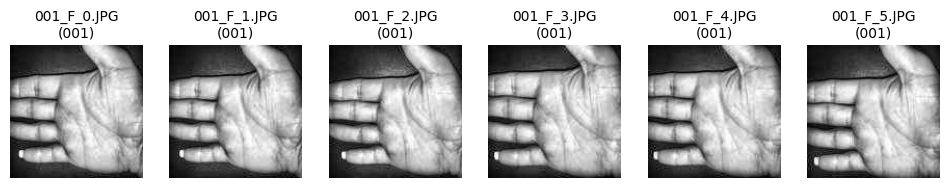

In [11]:
# Path folder Step 3
step3_path = "../Dataset_processed"

# Ambil semua file gambar dari semua folder
all_files = []
for folder in os.listdir(step3_path):
    folder_path = os.path.join(step3_path, folder)
    if os.path.isdir(folder_path):
        for ext in ["*.jpg", "*.JPG", "*.jpeg", "*.png", "*.tif", "*.tiff"]:
            all_files.extend(glob.glob(os.path.join(folder_path, ext)))

# Ambil 6 gambar pertama
sample_files = all_files[:6]

# Tampilkan
plt.figure(figsize=(12,6))
for i, f in enumerate(sample_files):
    img = Image.open(f)
    label = os.path.basename(os.path.dirname(f))  # nama folder sebagai label
    plt.subplot(1, 6, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"{os.path.basename(f)}\n({label})", fontsize=10)
plt.show()

# 4. Pembuatan Model CNN

Dataset yang telah diproses kemudian digunakan untuk melatih model CNN.



### Memuat Data dan Membagi Dataset

Gambar dimuat ke dalam array NumPy dan labelnya diubah menjadi format one-hot encoding. Dataset kemudian dibagi menjadi data latih (80%) dan data validasi (20%).

In [ ]:
# Path dataset
data_dir = "../Dataset_processed"

# Parameter
img_size = (128, 128)

# Load semua gambar jadi numpy
X = []
y = []
classes = sorted(os.listdir(data_dir))
print("Kelas yang terdeteksi:", classes)

# Loop untuk membaca setiap gambar dari dataset
for label, cls in enumerate(classes):
    cls_path = os.path.join(data_dir, cls)
    for file in os.listdir(cls_path):
        file_path = os.path.join(cls_path, file)
        img = load_img(file_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0   # normalisasi 0-1
        X.append(img_array)
        y.append(label)

# Ubah list menjadi array NumPy dengan tipe float32 (agar efisien dan cocok untuk model)
X = np.array(X, dtype="float32")

# Ubah label (0,1,2,...) menjadi one-hot encoding sesuai jumlah kelas
y = tf.keras.utils.to_categorical(y, num_classes=len(classes))

print("Shape X:", X.shape)  # Tampilkan dimensi data gambar (jumlah, tinggi, lebar, channel)
print("Shape y:", y.shape)  # Tampilkan dimensi label setelah one-hot

# Split train-val
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Model CNN sederhana
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),  # Conv layer pertama
    layers.MaxPooling2D(2,2),                                              # Pooling untuk reduksi dimensi
    
    layers.Conv2D(64, (3,3), activation="relu"),                           # Conv layer kedua
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation="relu"),                          # Conv layer ketiga
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),                                                      # Rata-kan output menjadi vektor
    layers.Dense(256, activation="relu"),                                  
    layers.Dropout(0.5),                                                   # Dropout untuk mengurangi overfitting
    layers.Dense(len(classes), activation="softmax")                       
])

# Kompilasi model dengan optimizer Adam, loss categorical_crossentropy, dan metrik akurasi
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()# Tampilkan ringkasan arsitektur model

# Training
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Kelas yang terdeteksi: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093']
Shape X: (3677, 128, 128, 3)
Shape y: (3677, 92)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 

# 5. Evaluasi dan Hasil

Setelah pelatihan, kinerja model dievaluasi pada data set validasi.

### Akurasi dan Loss

Model mencapai akurasi validasi sebesar 91.30%.

In [13]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

Validation Loss: 0.5614
Validation Accuracy: 0.9130


### Grafik training

Grafik di bawah ini menunjukkan progres akurasi dan loss selama proses training, baik pada data train maupun data test.

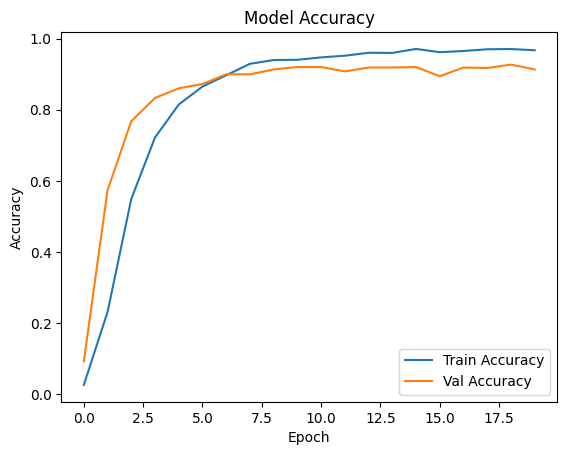

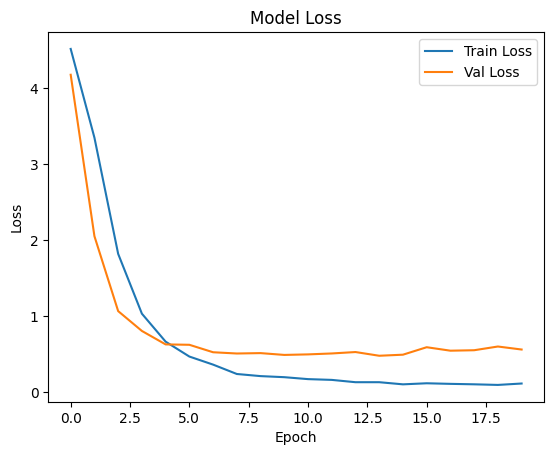

In [14]:
# Plot Accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Sampling Acak

Pada kode dibawah ini, data test diambil secara acak untuk melihat perbandingan hasil prediksi data telapak tangan dengan label yang sebenarnya

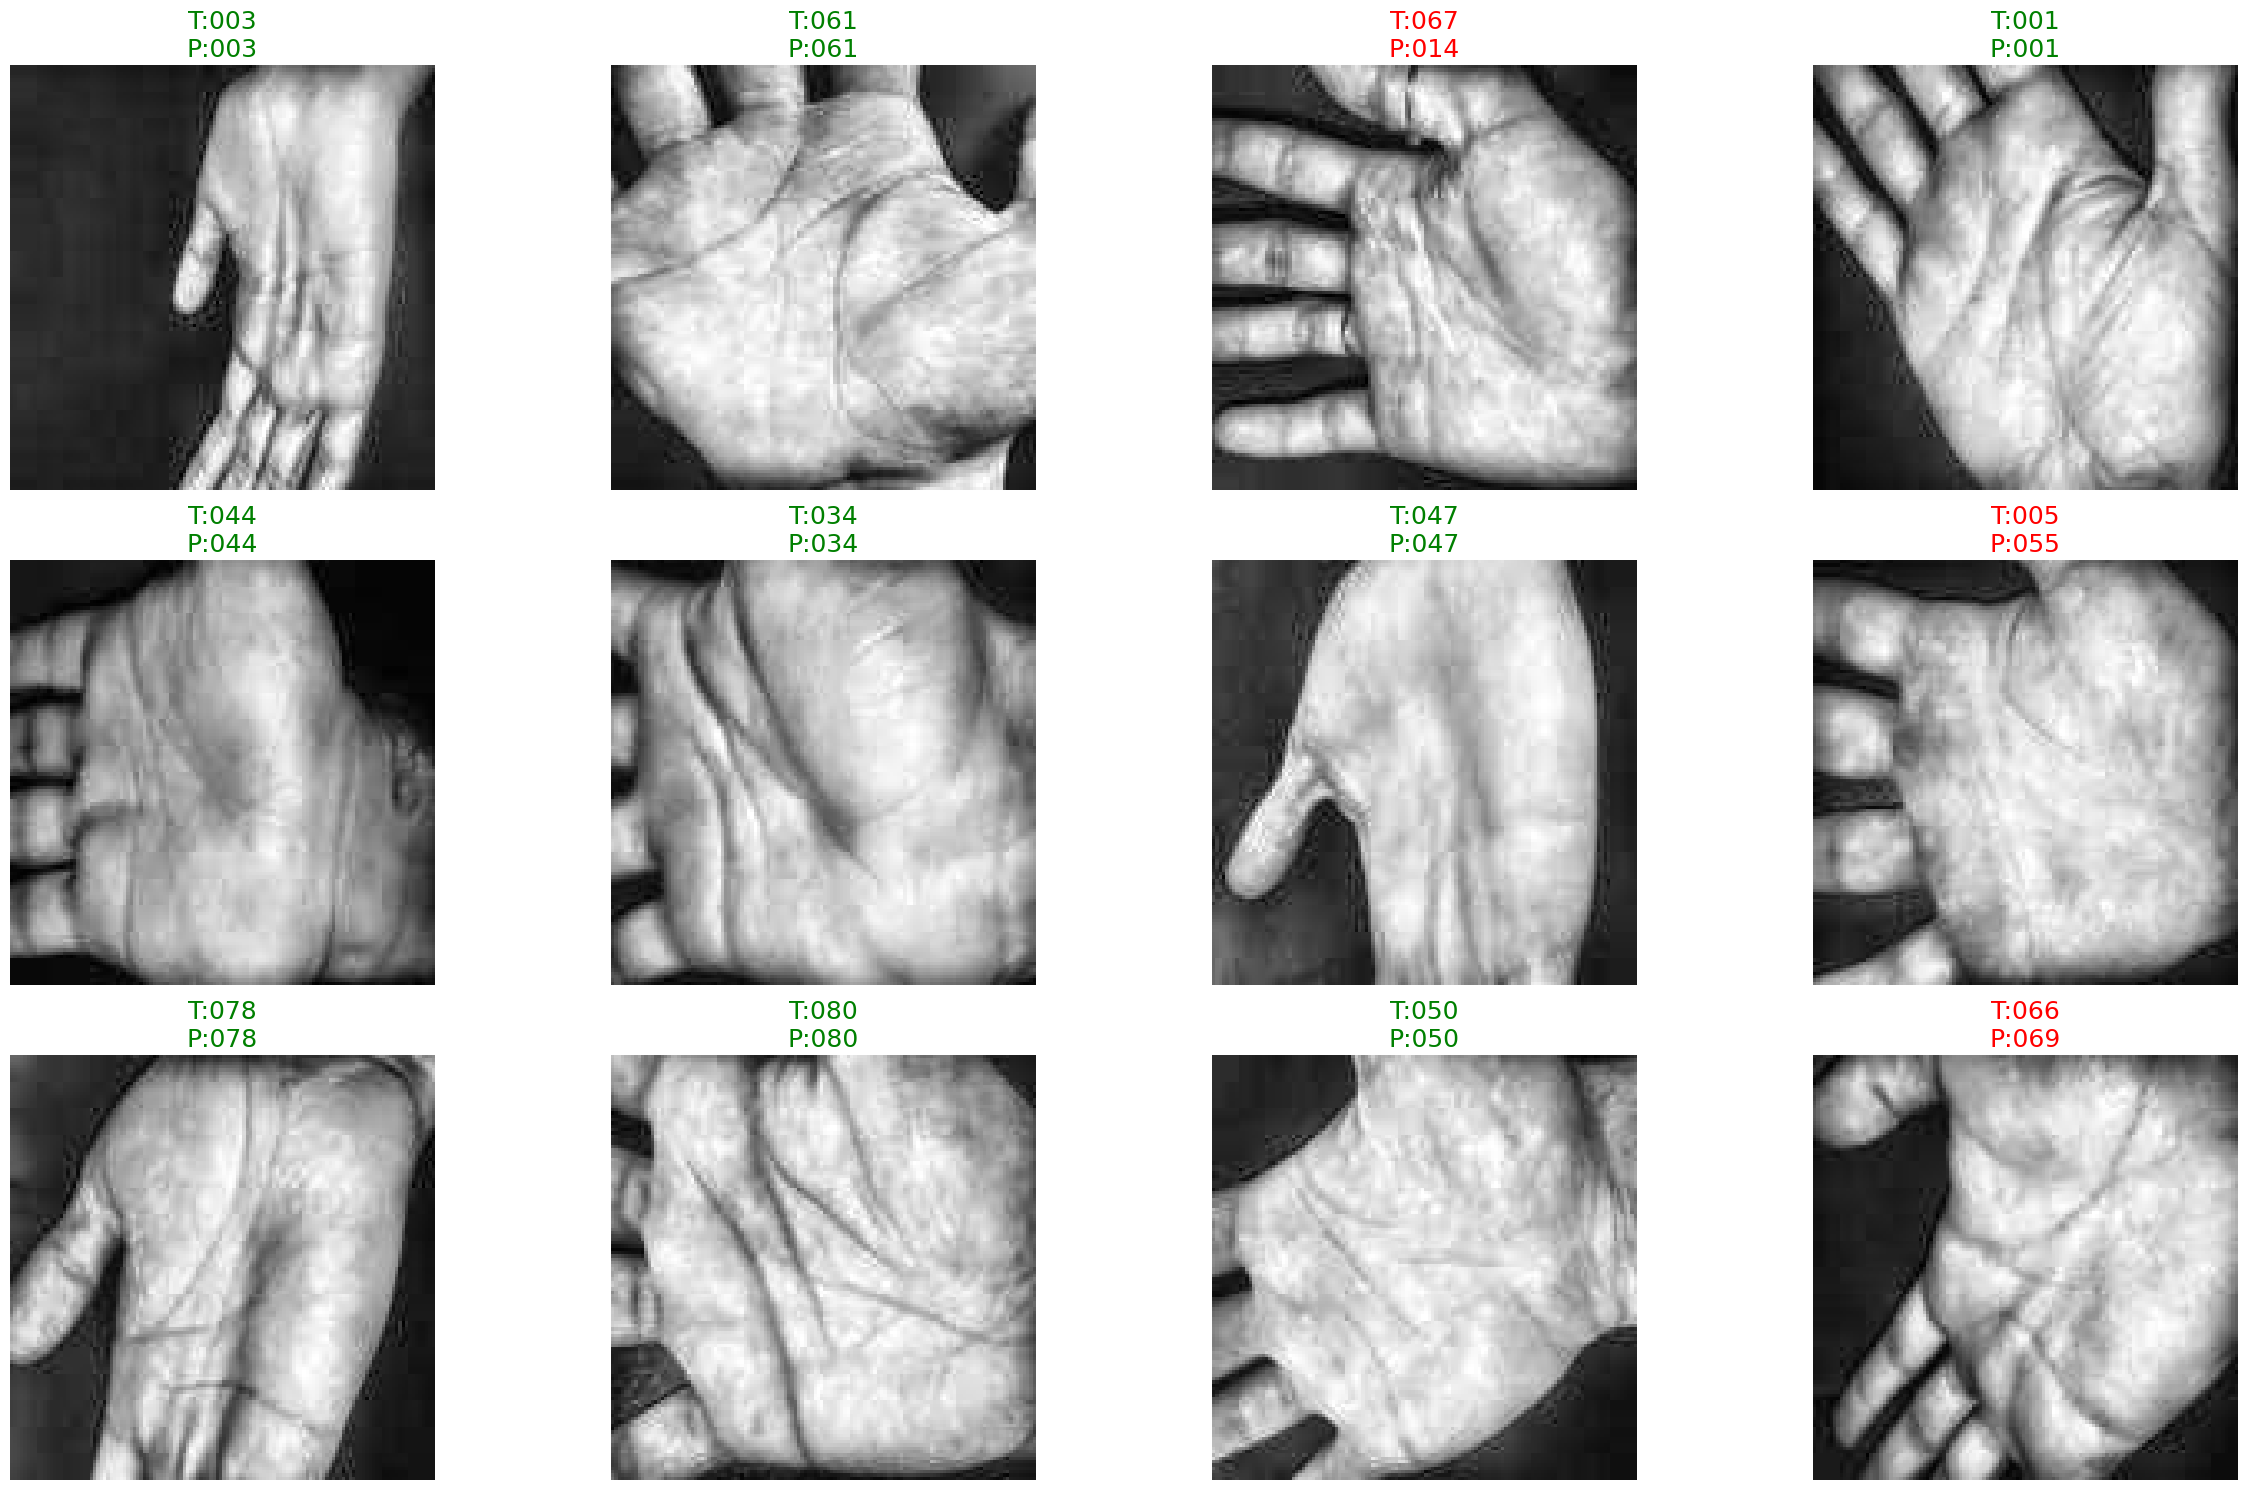

In [15]:

# ambil 12 sample random dari validation set
idxs = np.random.choice(len(X_val), 12, replace=False)

plt.figure(figsize=(25, 15))
for i, idx in enumerate(idxs):
    img = X_val[idx]
    true_label = np.argmax(y_val[idx])

    pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
    pred_label = np.argmax(pred)

    plt.subplot(3, 4, i+1) 
    plt.imshow(img, cmap="gray")
    color = "green" if pred_label == true_label else "red"
    plt.title(
        f"T:{classes[true_label]}\nP:{classes[pred_label]}",
        fontsize=18,
        color=color
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


### Laporan Klasifikasi

Laporan klasifikasi memberikan rincian kinerja model untuk setiap kelas, termasuk precision, recall, dan f1-score.

In [16]:

# Prediksi di validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# menampilkan laporan klasifikasi
print(classification_report(y_true, y_pred_classes, target_names=classes))

23/23 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

         001       1.00      1.00      1.00         8
         002       1.00      1.00      1.00         8
         003       1.00      0.88      0.93         8
         004       0.88      0.88      0.88         8
         005       0.88      0.88      0.88         8
         006       1.00      1.00      1.00         8
         007       1.00      0.38      0.55         8
         008       0.88      0.88      0.88         8
         009       1.00      0.88      0.93         8
         010       0.88      0.88      0.88         8
         011       0.88      0.88      0.88         8
         012       0.67      1.00      0.80         8
         013       0.88      0.88      0.88         8
         014       0.73      1.00      0.84         8
         015       1.00      1.00      1.00         8
         016       1.00      0.62      0.77         8
         017       0.89    

## Coba Grayscale

Mencoba membuat model dari dataset yang hanya di grayscale saja

In [ ]:
# Path dataset
data_dir2 = "../Dataset_step1"

# Parameter
img_size2 = (128, 128)

# Load semua gambar jadi numpy
X2 = []
y2 = []
classes2 = sorted(os.listdir(data_dir2))
print("Kelas yang terdeteksi:", classes2)

# Loop untuk membaca setiap gambar dari dataset
for label2, cls2 in enumerate(classes2):
    cls_path2 = os.path.join(data_dir2, cls2)
    for file2 in os.listdir(cls_path2):
        file_path2 = os.path.join(cls_path2, file2)
        img2 = load_img(file_path2, target_size=img_size2)
        img_array2 = img_to_array(img2) / 255.0   # normalisasi 0-1
        X2.append(img_array2)
        y2.append(label2)

# Ubah list menjadi array NumPy dengan tipe float32 (agar efisien dan cocok untuk model)
X2 = np.array(X2, dtype="float32")
# Ubah label (0,1,2,...) menjadi one-hot encoding sesuai jumlah kelas
y2 = tf.keras.utils.to_categorical(y2, num_classes=len(classes2))

print("Shape X2:", X2.shape)    # Tampilkan dimensi data gambar (jumlah, tinggi, lebar, channel)
print("Shape y2:", y2.shape)    # Tampilkan dimensi label setelah one-hot

# Split train-val
X2_train, X2_val, y2_train, y2_val = train_test_split(
    X2, y2, test_size=0.2, stratify=y2, random_state=42
)

# Model CNN sederhana
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),   # Conv layer pertama
    layers.MaxPooling2D(2,2),                                               # Pooling untuk reduksi dimensi
    
    layers.Conv2D(64, (3,3), activation="relu"),                            # Conv layer kedua
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation="relu"),                           # Conv layer ketiga
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),                                                       # Rata-kan output menjadi vektor
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),                                                    # Dropout untuk mengurangi overfitting
    layers.Dense(len(classes2), activation="softmax")
])

# Kompilasi model dengan optimizer Adam, loss categorical_crossentropy, dan metrik akurasi
model2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model2.summary() # Tampilkan ringkasan arsitektur model

# Training
history2 = model2.fit(
    X2_train, y2_train,
    epochs=20,
    batch_size=32,
    validation_data=(X2_val, y2_val)
)

Kelas yang terdeteksi: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093']
Shape X2: (3677, 128, 128, 3)
Shape y2: (3677, 92)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                             

In [18]:
val_loss2, val_acc2 = model2.evaluate(X2_val, y2_val, verbose=0)
print(f"Validation Loss: {val_loss2:.4f}")
print(f"Validation Accuracy: {val_acc2:.4f}")

Validation Loss: 0.6464
Validation Accuracy: 0.9022


Model yang dilatih menggunakan dataset dalam format grayscale saja mencapai akurasi validasi sebesar 90,22%.

## 6. Kesimpulan

Model CNN yang dikembangkan berhasil mencapai akurasi validasi yang sangat baik, yaitu 91.30%, dalam tugas palm recognition pada 92 kelas yang berbeda. Tahapan praproses, terutama penggunaan CLAHE untuk meningkatkan kontras, terbukti efektif dalam menonjolkan fitur-fitur penting pada gambar.

Arsitektur CNN yang relatif sederhana mampu mempelajari representasi fitur yang diskriminatif dari data. Hasil ini menunjukkan bahwa pendekatan deep learning dengan CNN sangat menjanjikan untuk aplikasi biometrik berbasis telapak tangan.